In [1]:
import numpy.matlib
import numpy as np
import cmath
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
def gaussian_beam(x,y,z,w_0,lamda,e_L):
    
    #wave number k
    k = 2*np.pi/lamda
    
    #below constants are as defined in the paper
    z_R = np.pi*w_0**2/lamda 
    w_z = w_0*np.sqrt(1+(z/z_R)**2)

    phi_z = np.arctan(z/z_R)

    #Rz tends to infinity as z tends to 0. Which is why this ifelse condition is required
    if abs(z) < 1e-50:
        R_z = 1e100
        theta=0
    else:
        R_z = z*(1+(z_R/z)**2)
        #This is the coeff of i in the exponential. 
        theta = k*z - phi_z + k*(x**2+y**2)/2*R_z
    
    #Following are the magnitude, real part and imaginary part respectively of the electric field of incident light
    E_0 = (w_0/w_z)*np.exp(-1*(x**2+y**2)/w_z**2)*(np.cos(theta) + j*np.sin(theta))
    E_0 = E_0*e_L

    return E_0

In [3]:
#polaization direction
e_x = np.array([1,0.,0.])
#wavelength
lamda = 1
#waist
w_0 = 1.56*lamda

#position of x,y at which values of electric field along z axis are plotted
x = 0
y = 0

#initialization
E_0 = np.array([0,0,0])
#range of z
z = np.arange(-8*lamda, 8*lamda, 0.01)

for i in z:
    E_0_i = gaussian_beam(x,y,i,w_0,lamda,e_x)
    E_0 = np.vstack([E_0, E_0_i])
    
#deleting first row added during initialization
E_0 = np.delete(E_0,0,0)

plt.plot(z,E_0.real[:,0]) #plotting only x component as remaining components are 0 because of polarization
plt.xlabel('z/$\lambda$')
plt.ylabel('Re[$E_0$]')
plt.title('Plot at x=0, y=0 with $e_x$ polarization')
# function to show the plot
plt.show()


NameError: name 'j' is not defined

In [4]:
#Field value at points where atoms are placed i.e. z=0

#n is number of atoms in one row/column
n = 26
N = n**2
#separation between atoms
a = 0.2*lamda

E_n = np.array([0,0,0])

#position of atoms is at (x,y,0)
x = np.arange(-(n-1)*a/2, (n)*a/2, a)
y = np.arange(-(n-1)*a/2, (n)*a/2, a)
y = np.flip(y,0)
z = 0

#The order is as explained in the final cell of gaussian_beam
for j in y:
    for i in x:
        E_n_i = gaussian_beam(i,j,z,w_0,lamda,e_x)
        E_n = np.vstack([E_n, E_n_i])
    
E_n = np.delete(E_n,0,0)

#shape of each E_n, re_E_n, im_E_n is 26*26 x 3.
import sys
np.set_printoptions(threshold=sys.maxsize)

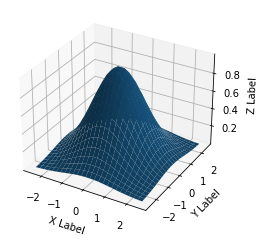

In [5]:
#Trying out different plots
X, Y = np.meshgrid(x, y)

# Z.shape must be equal to X.shape = Y.shape
Z = E_n.real[:,0].reshape((n,n))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

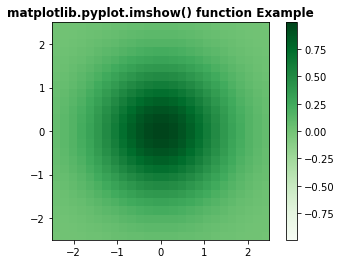

In [6]:
#Trying out different plots
z_min, z_max = -np.abs(E_n.real[:,0]).max(), np.abs(E_n.real[:,0]).max()

fig, ax = plt.subplots()

c = plt.imshow(E_n.real[:,0].reshape(26,26), cmap ='Greens', vmin = z_min, vmax = z_max, extent =[x.min(), x.max(), y.min(), y.max()], interpolation ='nearest', origin ='lower')
plt.colorbar(c)
  
plt.title('matplotlib.pyplot.imshow() function Example', 
                                     fontweight ="bold")
plt.show()


In [7]:
'''Final 3N vector of electric field (magnitude, real part and imaginary part are separated). Here, the order goes as 
(-(n-1)*a/2,-(n-1)*a/2); (-(n+1)*a/2,-(n-1)*a/2); (-(n+3)*a/2,-(n-1)*a/2); ... ((n-1)*a/2,-(n-1)*a/2);  
(-(n-1)*a/2,-(n+1)*a/2); ...                                                   ((n-1)*a/2,-(n+1)*a/2);
.
.
.
(-(n-1)*a/2,(n-1)*a/2); ...                                                    ((n-1)*a/2,(n-1)*a/2)

where (x,y) represent coordinates of the atoms.
'''
E_n = E_n.flatten()

In [8]:
j=complex(0,1) # iota , sqrt of -1
n_side=26# no. of atoms along an edge of the array
n=n_side**2 # for a square atomi array
c_light=3*10**8 #m/s speed of light
lamda=500 * 10**-9# (in m) wavelength of light
w=2*np.pi*c_light/lamda
a=0.2*lamda# interatomic distance
L=(n_side-1)*a # length of the atomic array
k=2*np.pi/lamda # wavenumber of incidnet light
epsilon=8.85*10**-12# SI units, permitivitty of free space

m=9.1*10**-31# kg mass of electron
e=1.6*10**-19 # Coulomb electronic charge
r_atom=0.59 *10**-10# m H atom radius
#w_a=np.sqrt(2*e**2/(m*(r_atom**3)*(4*np.pi*epsilon)))

#assuming no non-radiative losses and w_a=w

w_a=w 
lamda_a=c_light/(w_a/(2*np.pi))

alpha=3/(4*np.pi**2)*epsilon*lamda_a**3*j # polarization of an atom

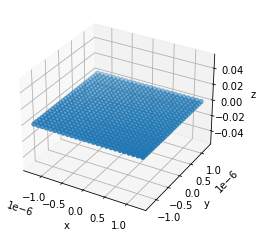

In [9]:
R=np.zeros(shape=(n,3)) 
for i in range(0,n):
    R[i]=((-L/2+a*(i%n_side)),(L/2-a*int((i/n_side))),0)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
#ax.view_init(3*10**-7,2*10**-7,'x')
ax.scatter3D(R[:,0],R[:,1],R[:,2],cmap="Greens")

In [10]:
def kron_delt(x,y):
    '''This is the kroncker delta function'''
    if (x==y):
        return 1
    else:
        return 0
    
    
def exp_i(a):
    '''converts the given phase into complex number and returns cartesian'''

    x=np.cos(a) + np.sin(a)*j
    return x
def Greens(m,l,k,r_1,r_2):
    '''Calculates the greens function G_{ml}(r_1,r_2)'''
    if ((r_1[0]==r_2[0])and(r_1[1]==r_2[1])and(r_1[2]==r_2[2])):    #skip the same atom
        return 0
    else:
        r_vect=r_1-r_2 
        r=np.sqrt(np.sum(np.square(r_vect)))
        c_1=(k*r)*j
        if m==l: # serves as kronecker delta
            t1=(1+ (c_1-1)/((k*r)**2))
        else:
            t1=0
        t2=(-1 + (3-3*c_1/(k*r)**2))*r_vect[m]*r_vect[l]/r**2
        t3=exp_i(k*r)/(4*np.pi*r)*(t1+t2)
        return t3
    

In [11]:
G=np.empty(shape=(n,3,n,3),dtype=np.complex_)

#print(G)
for r_1 in range(0,n):      
        for m in range(0,3):
              for r_2 in range(0,n):
                    for l in range(0,3):
                        G[r_1,m,r_2,l]=Greens(m,l,k,R[r_1],R[r_2])
                    

In [12]:
G_M=G.reshape(3*n,3*n)
# now  is in 3n * 3n matrix  form  
I_M=np.identity(3*n,dtype=np.complex_)
INVERSE_M=np.linalg.inv(I_M-(4*(np.pi**2)*alpha/(epsilon*lamda**2)*G_M))
#import sys

#np.set_printoptions(threshold=sys.maxsize)
#print(G)

In [13]:
E_0_at_atoms=E_n # E_0 is at atoms
E_0_V=E_0_at_atoms.reshape(3*n,1)

In [14]:
E_at_atoms_V=np.matmul(INVERSE_M,E_0_V)

In [15]:
E_at_atoms=E_at_atoms_V.reshape(n,3)

In [28]:
def E(x,y,z,E_at_atoms):#e-x =1,0,0
    E_space=np.zeros(shape=(3,),dtype=np.complex_)
    t=4*(np.pi**2)*alpha/(epsilon*lamda**2)
    E_0_at_r=gaussian_beam(x,y,z,w,lamda,np.array([1,0,0]))
    for i in range(0,3):
        G=0
        for j_dash in range(0,3):
            for atoms_index in range(0,n):
                G+=Greens(i,j_dash,k,(x,y,z),R[atoms_index])*E_at_atoms[atoms_index,j_dash]
        E_space[i]= E_0_at_r[i].imag+t*G
        
    return E_space
      

In [29]:
perpendicular_direction=np.arange(-5*lamda,5*lamda,a/5)
E_perpendicular_to_array=np.zeros(shape=(perpendicular_direction.shape),dtype=np.complex_)
for i in range(0,len(perpendicular_direction),1):
    E_perpendicular_to_array[i]=E(0,0,perpendicular_direction[i],E_at_atoms)[0]


#x=30+4*10j
#abs(x)

Text(0, 0.5, 'E')

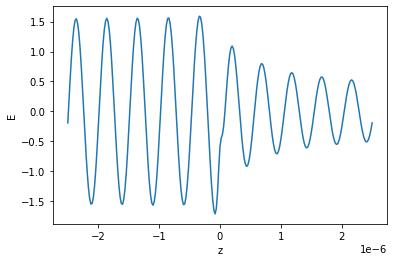

In [30]:
plt.plot(perpendicular_direction,E_perpendicular_to_array.real)    
plt.xlabel('z')
plt.ylabel('E')

In [31]:
E(0,0,perpendicular_direction[5],E_at_atoms)

array([ 1.39428163e+00+3.61587451e-01j, -1.13717036e-16-6.60365096e-17j,
       -2.48746357e-16-4.93032282e-16j])